NAME: ROHIT GARLA                               NET ID: rg3365                                            Assignment 1

In [323]:
import pandas as pd
import math

## Loading the Data

In [359]:
traindata= pd.read_csv("spambasetrain.csv",names=[0,1,2,3,4,5,6,7,8,9])
testdata=pd.read_csv("spambasetest.csv",names=[0,1,2,3,4,5,6,7,8,9])

In [360]:
traindata.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.316,0.0,0.000,0.000,0.000,1.125,2,9,0
1,0.0,0.735,0.0,0.735,0.000,0.000,2.571,10,18,0
2,0.0,0.105,0.0,0.000,0.158,0.000,1.494,10,139,1
3,0.0,0.299,0.0,0.000,0.000,0.199,2.465,28,106,1
4,0.0,0.000,0.0,0.817,0.000,0.000,1.857,15,39,0


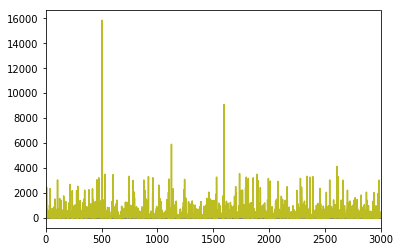

In [375]:
%matplotlib inline
for x in range(0,9):
    traindata[x].plot()

In [326]:
noofclass1=len(traindata[(traindata[9]==1)])
noofclass0=len(traindata[(traindata[9]==0)])
totalno=len(traindata)

In [327]:
noofclass1

1205

In [328]:
noofclass0

1794

In [329]:
totalno

2999

In [330]:
pc1=noofclass1/totalno
pc1

0.4018006002000667

In [331]:
pc0=noofclass0/totalno
pc0

0.5981993997999333

In [332]:
xc1=traindata[(traindata[9]==1)]
xc1=xc1.reset_index(drop=True)
xc0=traindata[(traindata[9]==0)]
xc0=xc0.reset_index(drop=True)
xc1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.105,0.0,0.000,0.158,0.000,1.494,10,139,1
1,0.0,0.299,0.0,0.000,0.000,0.199,2.465,28,106,1
2,0.0,0.075,0.0,0.613,0.532,0.137,7.300,763,2453,1
3,0.0,0.204,0.0,0.204,0.127,0.102,2.962,73,400,1
4,0.0,0.000,0.0,0.000,0.000,0.000,2.083,7,25,1


In [333]:
mean1=[0,0,0,0,0,0,0,0,0]
mean0=[0,0,0,0,0,0,0,0,0]

In [334]:
for x in range(len(mean1)):
    mean1[x]=xc1[x].mean()
for x in range(len(mean0)):
    mean0[x]=xc0[x].mean()

In [335]:
mean0

[0.048425863991081425,
 0.1574866220735784,
 0.016959866220735784,
 0.1107129319955407,
 0.011502787068004453,
 0.025892419175027874,
 2.376589743589742,
 18.182274247491637,
 164.1432552954292]

In [336]:
s1=[0,0,0,0,0,0,0,0,0]
s0=[0,0,0,0,0,0,0,0,0]
variance1=[0,0,0,0,0,0,0,0,0]
variance0=[0,0,0,0,0,0,0,0,0]

In [337]:
for y in range(len(variance1)):
    for x in range(len(xc1)):
        s1[y]=s1[y]+(((xc1[y][x])-mean1[y])*((xc1[y][x])-mean1[y]))
    variance1[y]=s1[y]/(len(xc1)-1)

for y in range(len(variance0)):
    for x in range(len(xc0)):
        s0[y]=s0[y]+(((xc0[y][x])-mean0[y])*((xc0[y][x])-mean0[y]))
    variance0[y]=s0[y]/(len(xc0)-1)
    

In [338]:
pxc1=[0,0,0,0,0,0,0,0,0]
pxc0=[0,0,0,0,0,0,0,0,0]
output=testdata
output["result"]=1
output.head()

,0,1,2,3,4,5,6,7,8,9,result
0,0.000,0.000,0.00,0.000,0.000,0.0,2.000,4,6,0,1
1,0.000,0.000,0.00,0.102,0.000,0.0,2.531,30,81,0,1
2,0.000,0.492,0.00,0.000,0.000,0.0,1.890,11,138,0,1
3,0.203,0.195,0.05,0.000,0.014,0.0,2.880,45,1080,0,1
4,0.000,0.000,0.00,0.874,0.000,0.0,5.114,107,179,1,1


In [339]:
for x in range(len(testdata)):
    for y in range(len(pxc1)):
        pxc1[y]=(1/(math.sqrt(2*math.pi*variance1[y]))*math.exp(-1*(((testdata[y][x])-mean1[y])*((testdata[y][x])-mean1[y]))/(2*(variance1[y]))))
        pxc0[y]=(1/(math.sqrt(2*math.pi*variance0[y]))*math.exp(-1*(((testdata[y][x])-mean0[y])*((testdata[y][x])-mean0[y]))/(2*(variance0[y]))))
    PC1=math.log2(pc1)
    PC0=math.log2(pc0)
    for y in range(len(pxc1)):
        PC1=PC1+math.log2(pxc1[y])
        PC0=PC0+math.log2(pxc0[y])
    if(PC1<PC0):
        output["result"][x]=0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [340]:
output1count=len(output[(output["result"]==1)])
output0count=len(output[(output["result"]==0)])

In [341]:
totaltest=len(output)
totaltest

200

In [362]:
#Estimated Value of P(C) for C=1
pc1

0.4018006002000667

In [364]:
#Estimated Value of P(C) for C=0
pc0

0.5981993997999333

In [344]:
#Capital Run length Longest label=1 
print(variance1[7],mean1[7])

36369.99111261216 97.2091286307054


In [345]:
#Char_freq_; for label 0
print(variance0[0],mean0[0])

0.08830560325706198 0.048425863991081425


In [346]:
#FIRST FIVE EXAMPLES
output["result"].head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [347]:
output["result"].tail()

195    0
196    0
197    0
198    0
199    0
Name: result, dtype: int64

In [348]:
totalcorrect = len(output[(output["result"]==output[9])])

In [349]:
totalcorrect

160

In [350]:
Errorpercent=0

In [351]:
#Calculating the error percentage
accuracy=totalcorrect/len(output)
accuracy
Errorpercent = 100-(accuracy*100)
Errorpercent

20.0

In [352]:
#ZERO R
accuracyR=0
if(noofclass1>noofclass0):
    dominatingClass = 1
else:
    dominatingClass = 0
output["ZeroR"]=dominatingClass
totalcorrect0R = len(output[(output["ZeroR"]==output[9])])
accuracyR = totalcorrect0R/len(output)
accuracyR

0.59

In [353]:
dominatingClass

0